## Context
The data set comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench. The PMSM represents a german OEM's prototype model. Test bench measurements were collected by the LEA department at Paderborn University.

## Content
All recordings are sampled at 2 Hz. The data sMet consists of multiple measurement sessions, which can be distinguished from each other by column "profile_id". A measurement session can be between one and six hours long.

The motor is excited by hand-designed driving cycles denoting a reference motor speed and a reference torque.
Currents in d/q-coordinates (columns "i_d" and i_q") and voltages in d/q-coordinates (columns "u_d" and "u_q") are a result of a standard control strategy trying to follow the reference speed and torque.
Columns "motor_speed" and "torque" are the resulting quantities achieved by that strategy, derived from set currents and voltages.

Most driving cycles denote random walks in the speed-torque-plane in order to imitate real world driving cycles to a more accurate degree than constant excitations and ramp-ups and -downs would.

## Acknowledgements
Several publications leveraged the setup of the PMSM in the Paderborn University Lab:



### Diccionario de Datos
u_q : Medición del componente q de tensión en coordenadas dq (en V) </br> coolant : Temperatura del refrigerante (en °C) </br> stator_winding : Temperatura del devanado del estator (en °C) medida con termopares </br> u_d : Medición del componente d de tensión en coordenadas dq </br> stator_tooth : Temperatura del diente del estator (en °C) medida con termopares </br> motor_speed : Velocidad del motor (en rpm) </br> i_d : Medición del componente d de corriente en coordenadas dq </br> i_q : Medición del componente q de corriente en coordenadas dq </br> pm : Temperatura del imán permanente (en °C) medida con termopares y transmitida de forma inalámbrica a través de una unidad de termografía. </br> stator_yoke : Temperatura del yugo del estator (en °C) medida con termopares </br> ambient : Entorno </br> torque : Par </br> profile_id : Id </br>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("measures_v2.csv")

In [7]:
data

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


In [8]:
data.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [9]:
filas, columnas = data.shape
print(f'La data tiene {filas} filas y {columnas} columnas')

La data tiene 1330816 filas y 13 columnas


In [10]:
data['profile_id'].unique()

array([17,  5, 12, 32, 21,  2,  4,  7, 19,  3,  9, 23, 27, 26, 11,  6, 10,
       13, 31, 18, 30, 29,  8, 24, 20, 15, 14, 16, 36, 74, 75, 41, 68, 50,
       53, 49, 81, 80, 59, 54, 57, 70, 51, 55, 45, 69, 61, 76, 56, 64, 72,
       73, 62, 65, 63, 43, 47, 66, 42, 48, 67, 44, 79, 52, 60, 46, 58, 78,
       71])

In [11]:
data_17 = data[data['profile_id']==17]

In [12]:
data_17

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15959,131.232086,18.098608,49.645897,-6.513609,43.098316,4999.946777,-97.676331,0.980545,51.822525,33.403080,24.637297,-0.421235,17
15960,131.169312,18.090189,49.578072,-6.500326,43.102539,4999.945312,-97.792351,0.953651,51.827511,33.396442,24.680479,-0.393254,17
15961,131.102997,18.089109,49.575481,-6.498843,43.100647,4999.947266,-97.791840,0.931305,51.831402,33.393707,24.715746,-0.389909,17
15962,131.055298,18.089380,49.606102,-6.476041,43.087551,4999.944336,-97.793709,0.903135,51.829365,33.398624,24.741184,-0.399254,17


[]

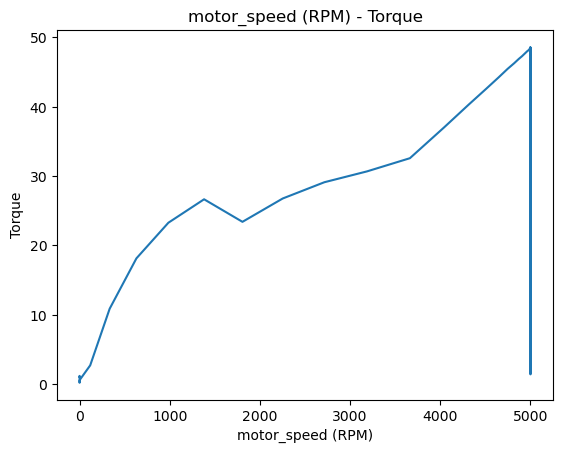

In [13]:
sns.lineplot(data=data_17, x='motor_speed', y='torque')
plt.xlabel('motor_speed (RPM)')
plt.ylabel('Torque')
plt.title('motor_speed (RPM) - Torque')
plt.plot()

## Tarea 2

Enviar por correo el jupyter notebook en su cuenta de github.

#### Parte 1
1) Utilizar el metodo `describe()`
2) En un ciclo for calcular la media, desviación estandar, valor máximo y mínimo de las columnas:
    - coolant
    - pm
3) Calcular la media por cada perfil
    - coolant
    - pm
4) Calcular la media por cada perfil utilizando groupby
    - coolant
    - pm
   
Usar `f-strings` para darle formato a los resultados de los incisos 2, 3 y 4
Imprimir el nombre de la columna que se esta analizando


#### Parte 2
Crear un grafico de linea para el torque(eje x)y la temperatura de el refrigerante( eje y )

In [36]:

temperature_cols = ['coolant', 'pm']

for col in temperature_cols:
    for col in temperature_cols:
    media = data[col].mean()
    desviacion = data[col].std()
    maximo = data[col].max()
    minimo = data[col].min()



IndentationError: expected an indented block after 'for' statement on line 3 (38092466.py, line 4)

In [26]:
profiles = data['profile_id'].unique()

for profile in profiles:
    

SyntaxError: incomplete input (83505972.py, line 4)

In [30]:
import pandas as pd


data = pd.read_csv("measures_v2.csv")

print("Resumen estadístico con describe():")
print(data[['coolant', 'pm']].describe())

temperature_cols = ['coolant', 'pm']

for col in temperature_cols:
    media = data[col].mean()
    desviacion = data[col].std()
    maximo = data[col].max()
    minimo = data[col].min()


    print(f"\nAnálisis de la columna {col}:")
    print(f"  Media: {media:.2f}")
    print(f"  Desviación Estándar: {desviacion:.2f}")
    print(f"  Valor Máximo: {maximo:.2f}")
    print(f"  Valor Mínimo: {minimo:.2f}")


print("\nMedia por perfil (sin groupby):")
for profile in data['profile_id'].unique():
    media_perfil_coolant = data[data['profile_id'] == profile]['coolant'].mean()
    media_perfil_pm = data[data['profile_id'] == profile]['pm'].mean()
    
   
    print(f"Perfil {profile}: coolant = {media_perfil_coolant:.2f}, pm = {media_perfil_pm:.2f}")


print("\nMedia por perfil (con groupby):")
media_perfiles = data.groupby('profile_id')[['coolant', 'pm']].mean()

print(media_perfiles)


FileNotFoundError: [Errno 2] No such file or directory: 'measures_v2.csv'